In [0]:
!pip install -q tensorflow==2.0

In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.0.0'

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout

In [0]:
from tensorflow.keras.models import Model

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
x_train, x_test = x_train/255, x_test/255

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [0]:
x_train = np.expand_dims(x_train, axis = -1)  #adds a dimension 

In [0]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
x_test = np.expand_dims(x_test, axis = -1)  #adds a dimension 

In [0]:
x_test.shape

(10000, 28, 28, 1)

In [0]:
k = len(set(y_train)) #We use the set dataset as it can only contain unqiue elements. k is the number of classes in this dataset so we want the length of a set of unique elements.

In [0]:
k

10

In [0]:
#Keras functional API
i = Input(shape = x_train[0].shape) #Shape of the first input ie. 28*28*1
x = Conv2D(32, (3,3), 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)                     #apparently dropouts are important (tried without them with 15 epochs which caused overfitting)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation = 'softmax')(x)
model = Model(i, x)

In [0]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
13504/60000 [=====>........................] - ETA: 39s - loss: 0.7137 - accuracy: 0.7366

KeyboardInterrupt: ignored

In [0]:
#Plotting Loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

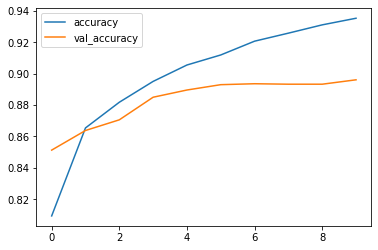

In [0]:
#Plotting Acuracy per iteration
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()